In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

In [31]:
prices = pd.read_csv('prices.csv')

In [79]:
prices['time'] = pd.to_datetime(prices['time'])
prices['time_rounded'] = prices['time'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour))
prices = prices.drop_duplicates(['product', 'shop', 'time_rounded'])

In [80]:
prices.head()

,product,shop,price,time,time_rounded
0,Intel Core i7-7800X,czc,10022,2018-07-27 13:13:01.536418,2018-07-27 13:00:00
1,ASUS GeForce ROG-STRIX-GTX1080TI-11G-GAMING,czc,22990,2018-07-27 13:13:01.950984,2018-07-27 13:00:00
2,ASUS PRIME X299-A - Intel X299,czc,7339,2018-07-27 13:13:02.254500,2018-07-27 13:00:00
3,ADATA XPG GAMMIX D10 32GB (2x16GB) DDR4 3000,czc,8999,2018-07-27 13:13:02.570936,2018-07-27 13:00:00
4,Be quiet! Dark Rock PRO 4,czc,1999,2018-07-27 13:13:03.854654,2018-07-27 13:00:00


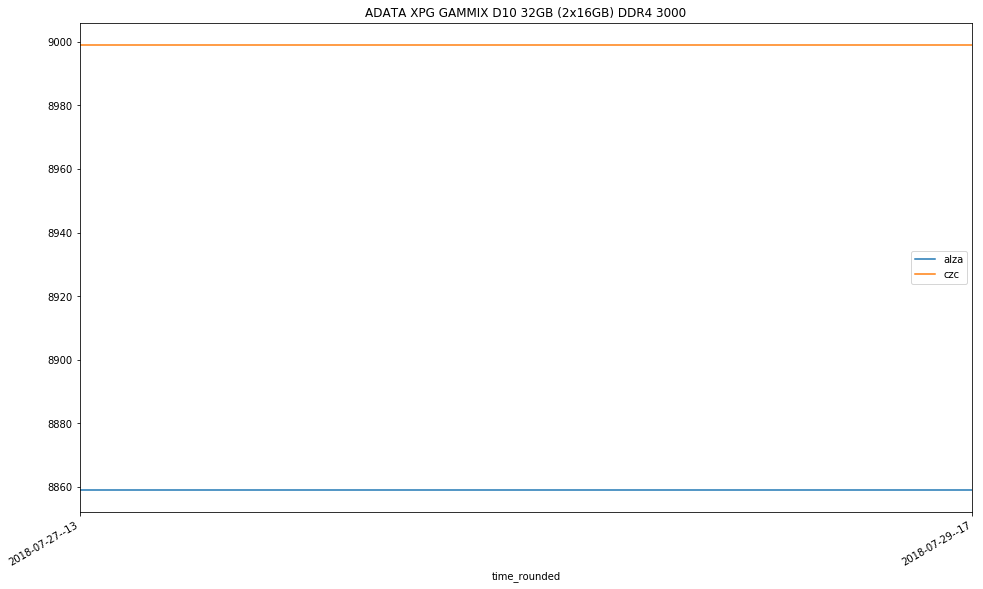

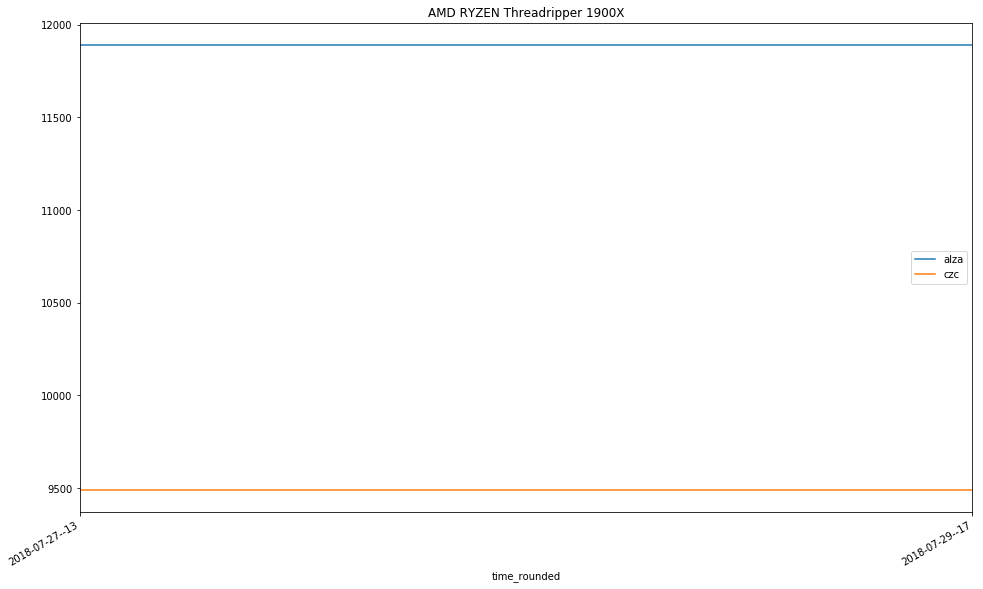

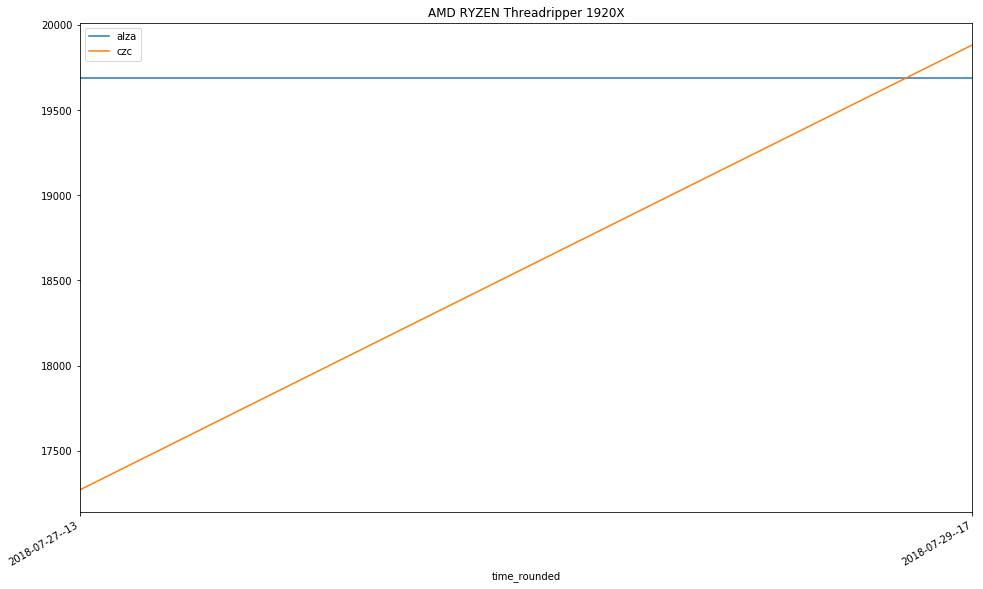

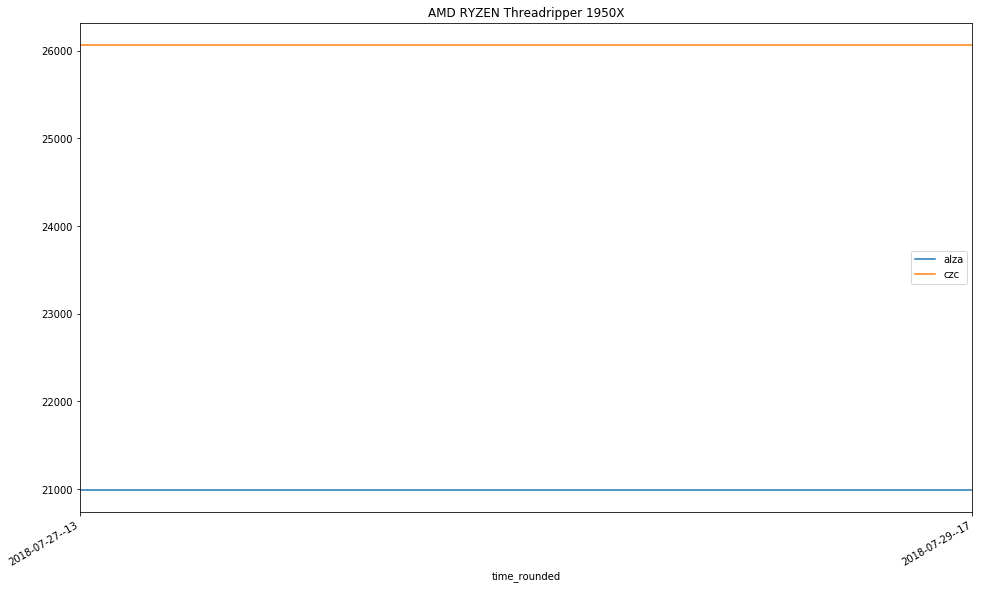

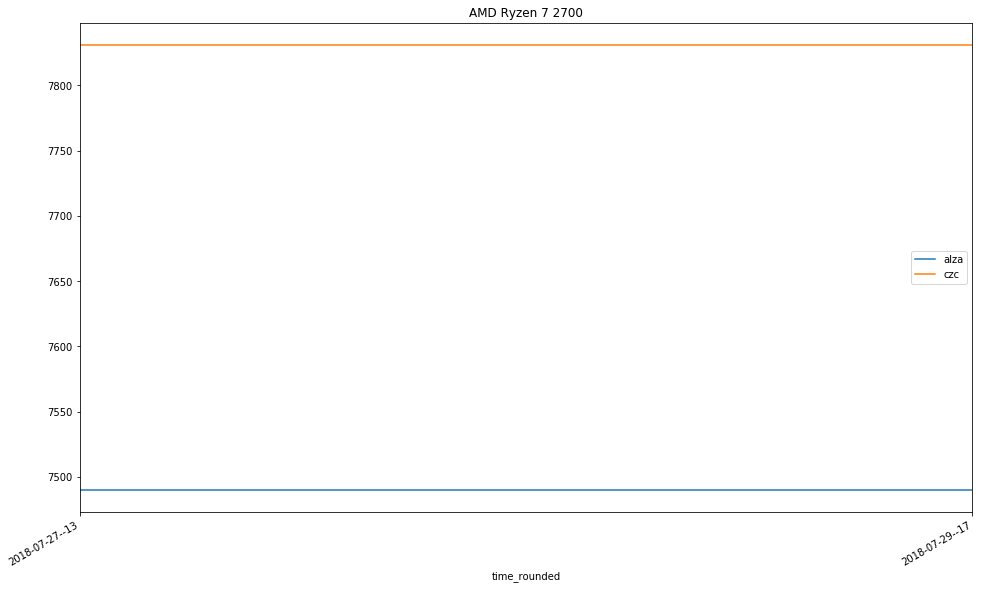

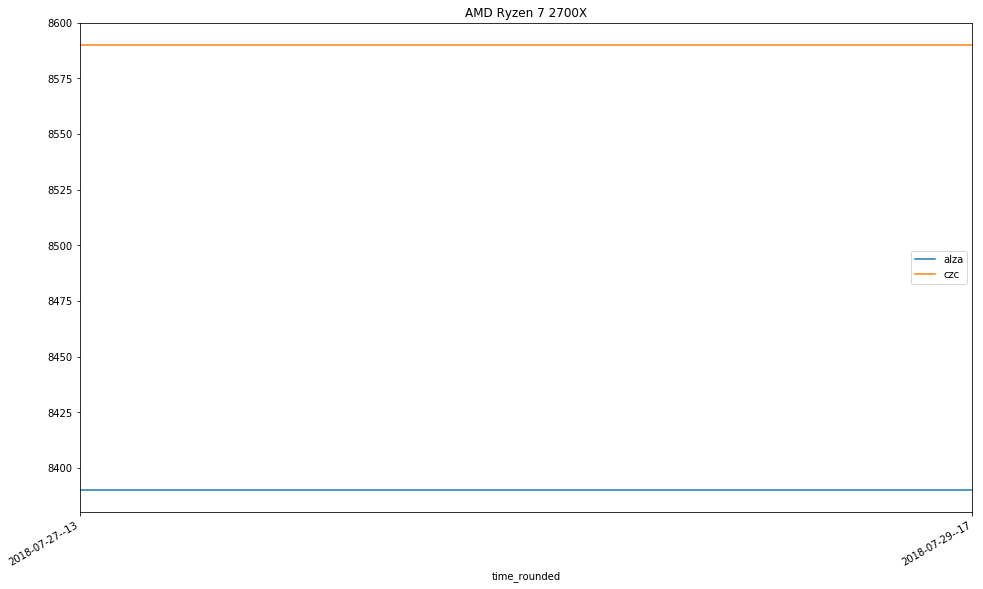

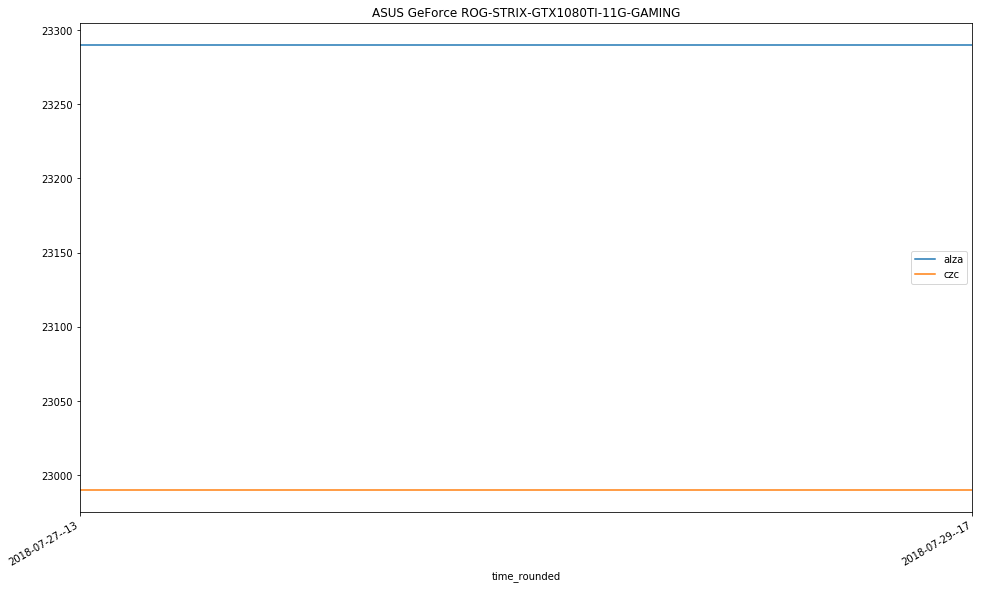

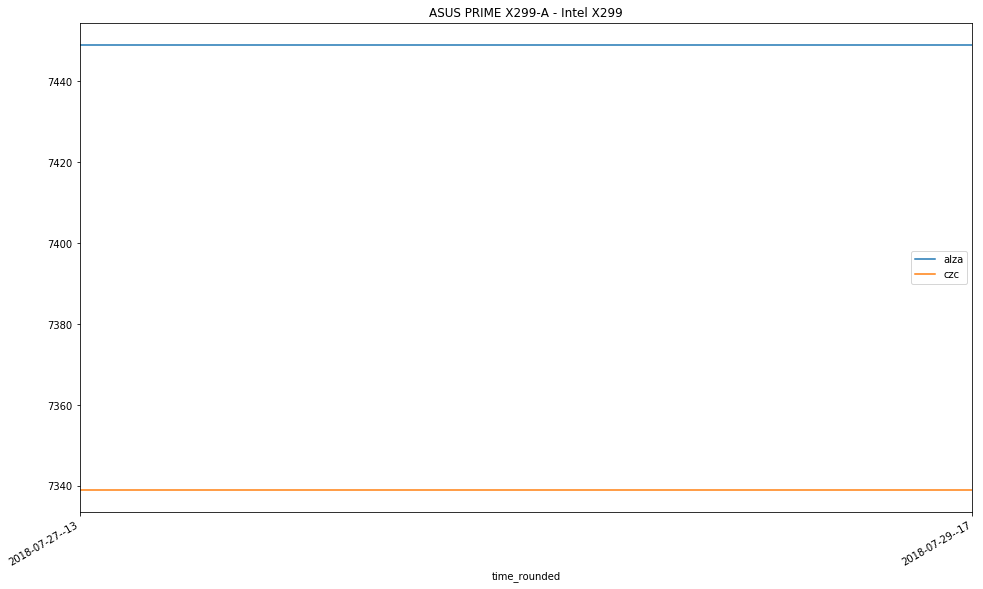

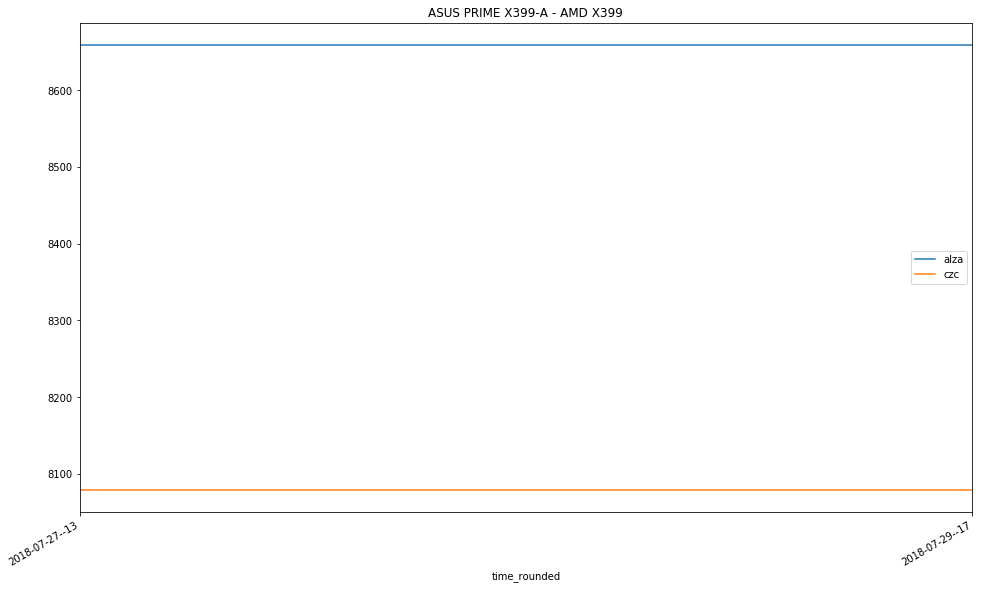

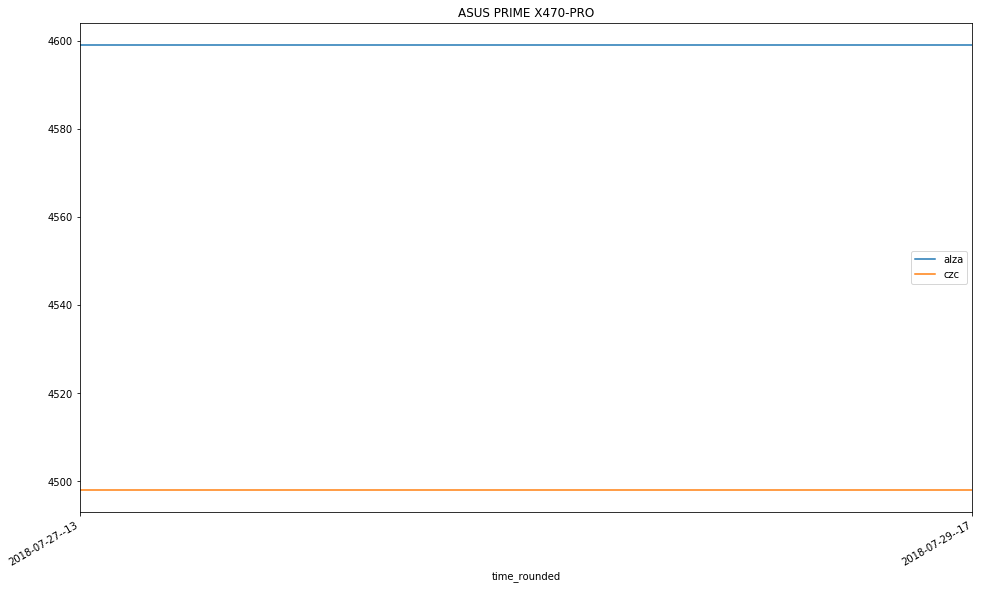

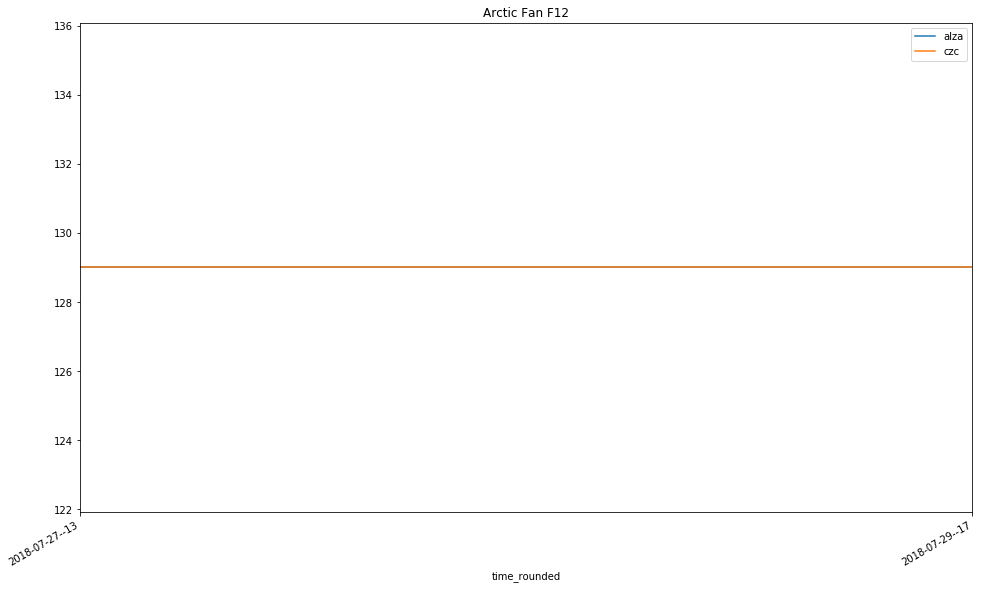

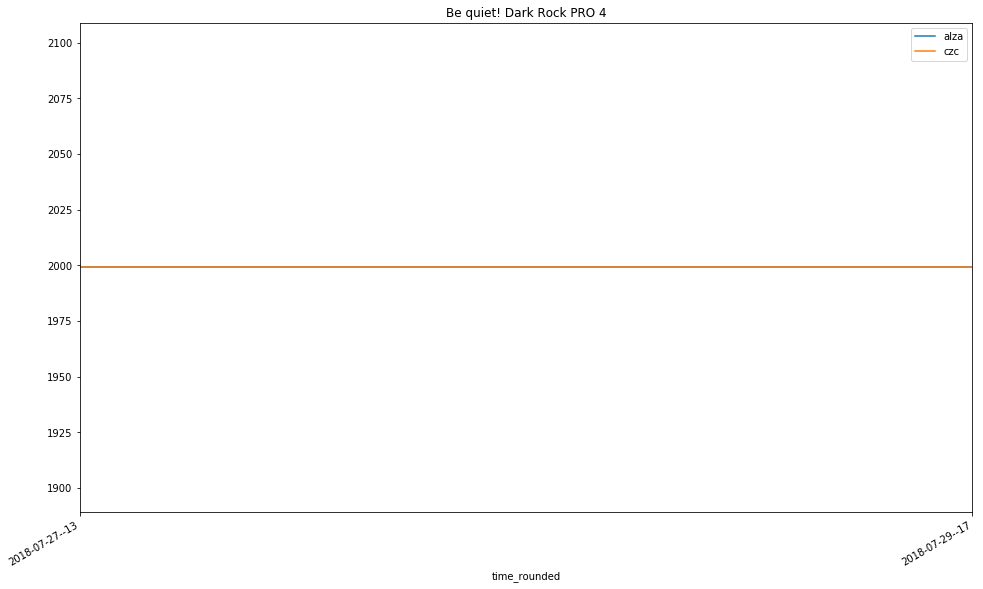

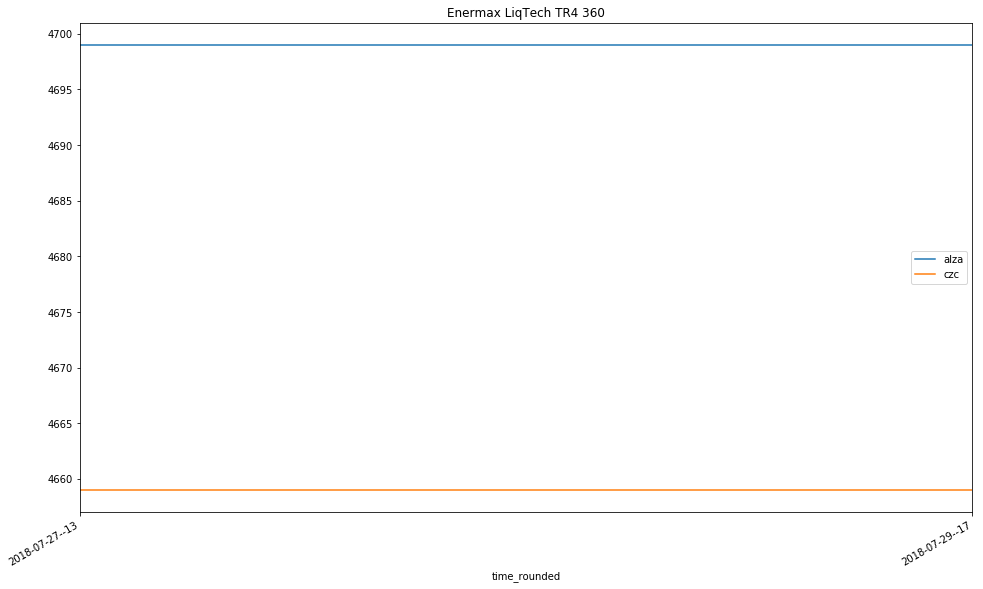

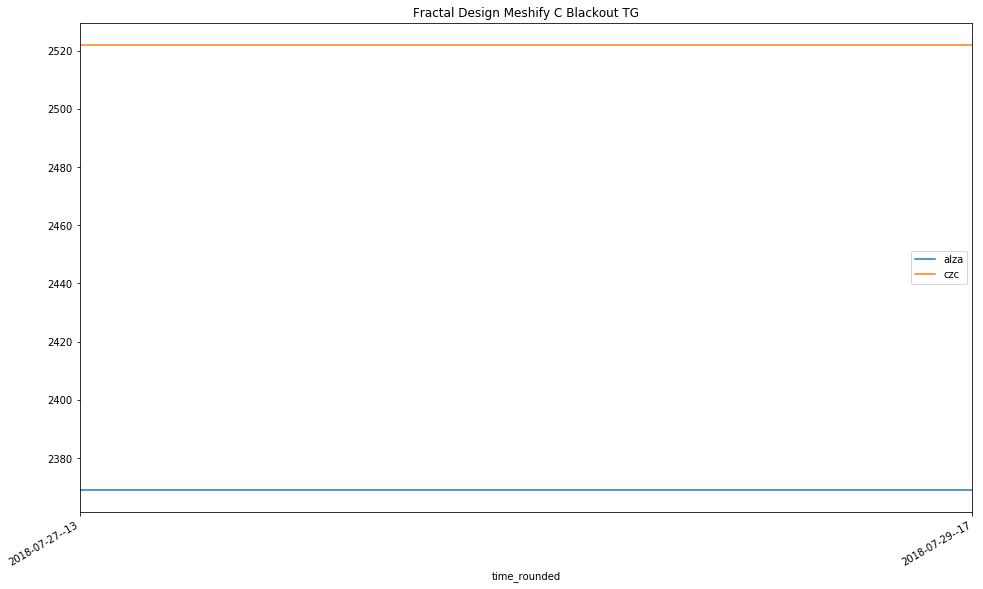

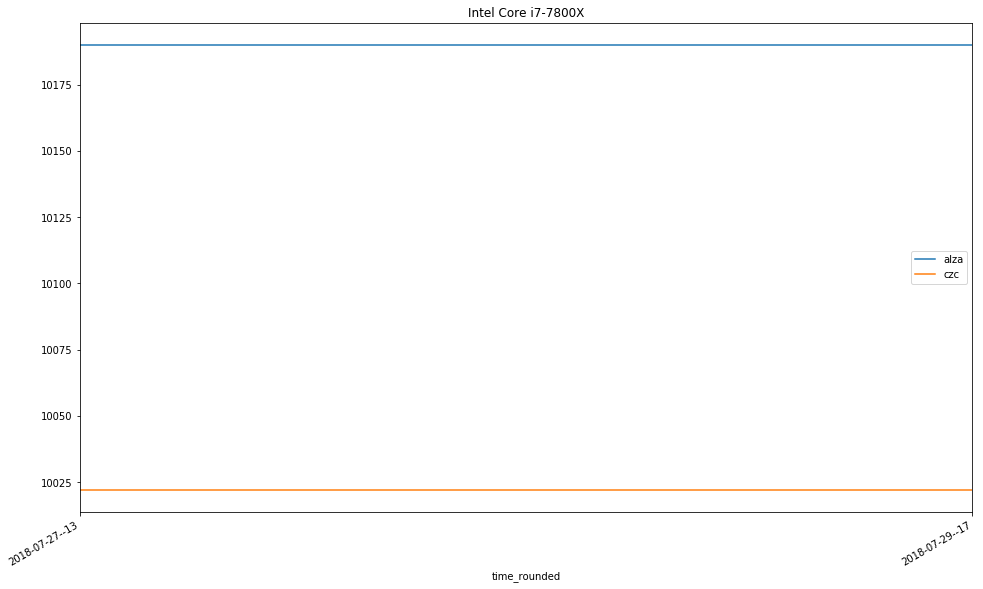

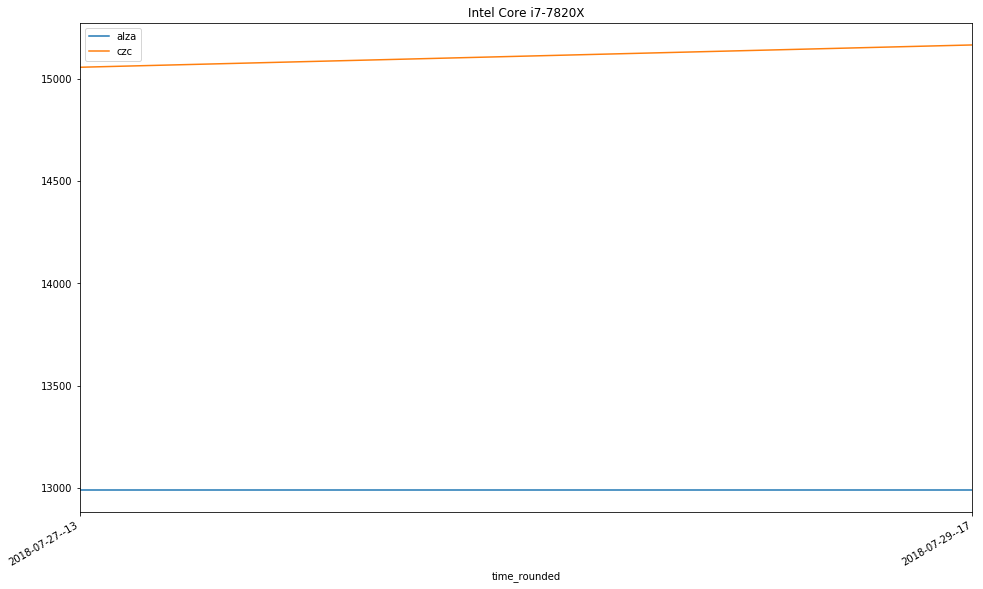

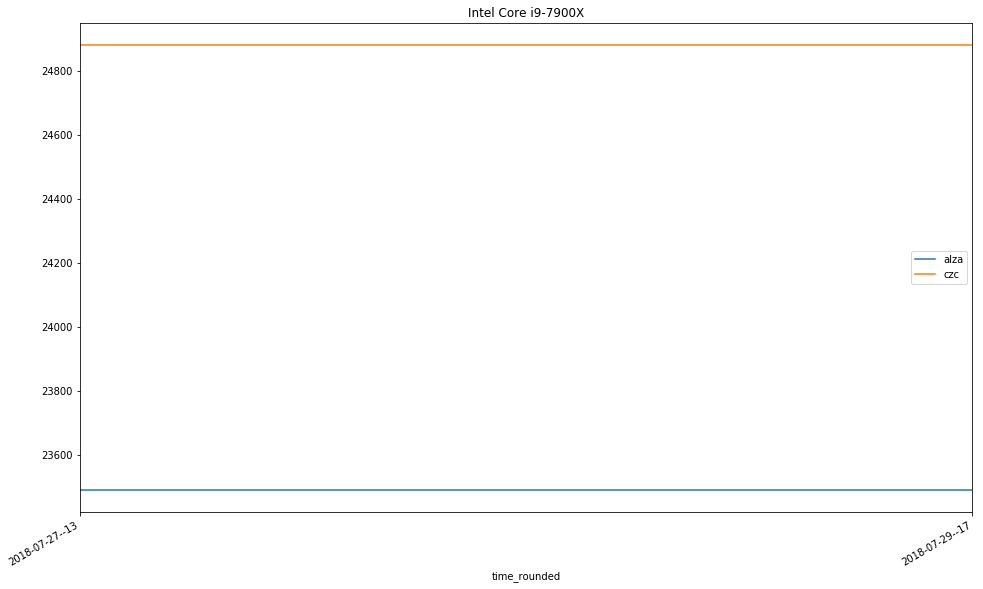

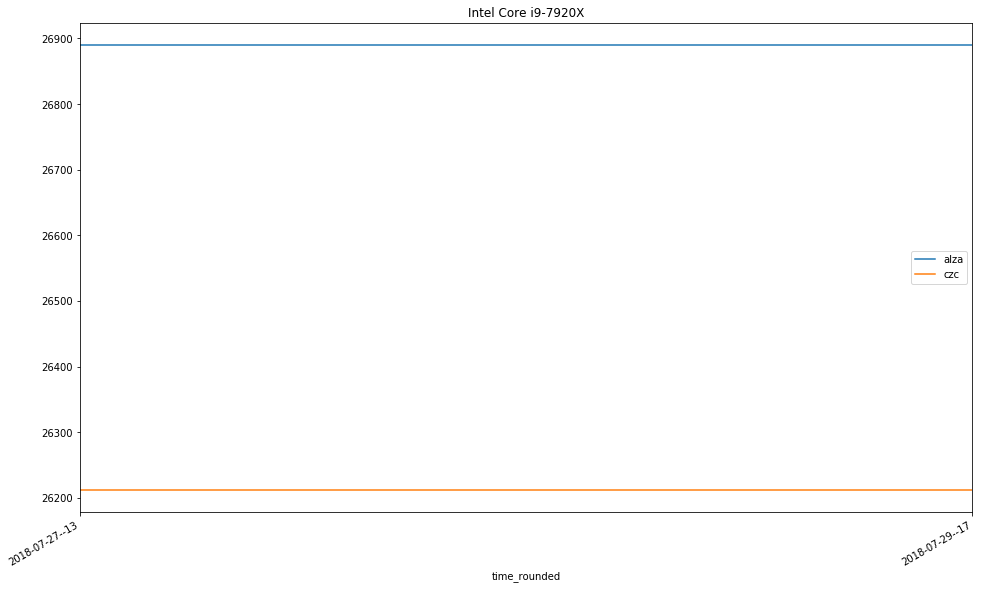

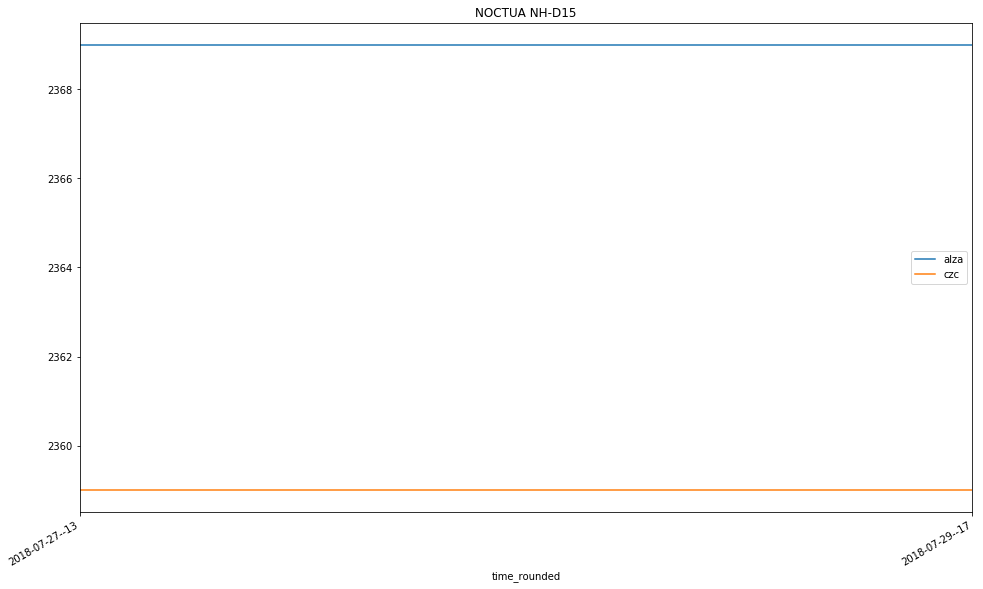

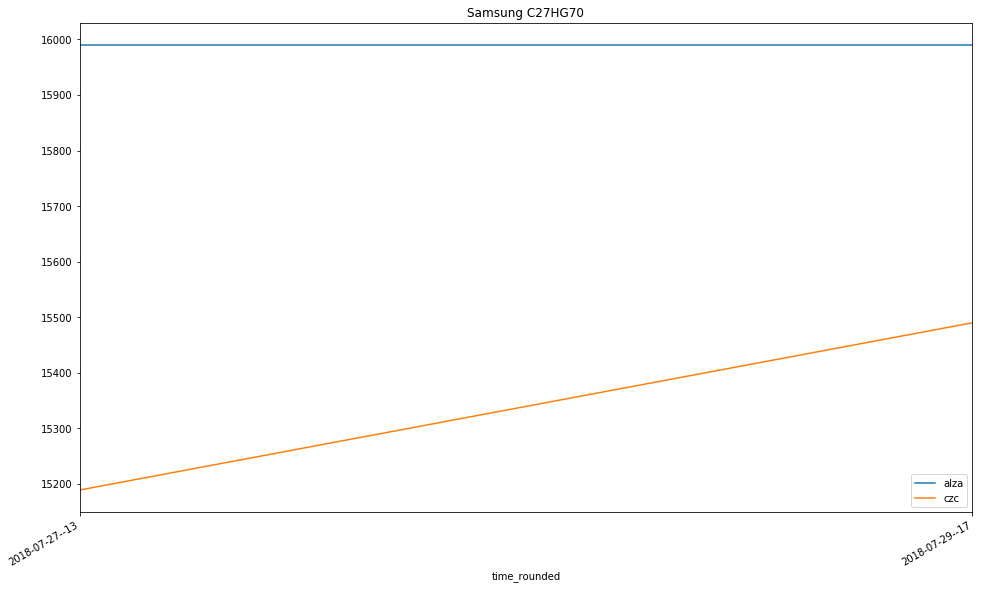

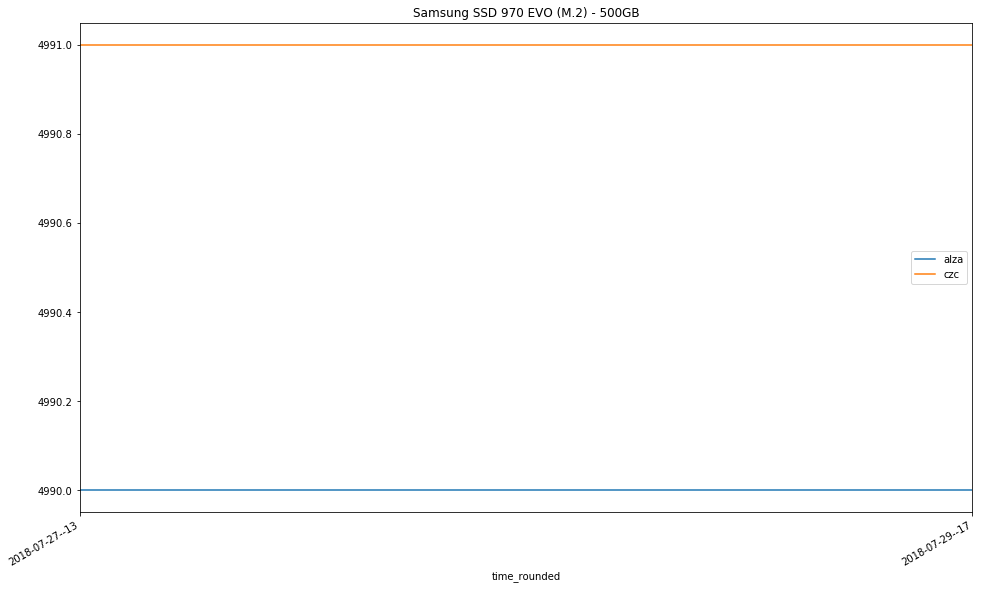

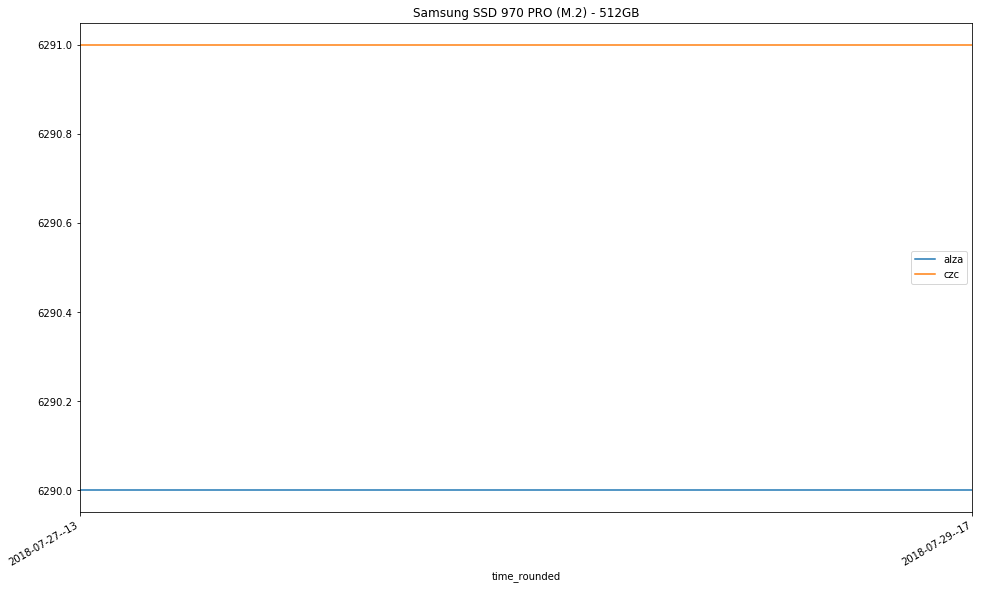

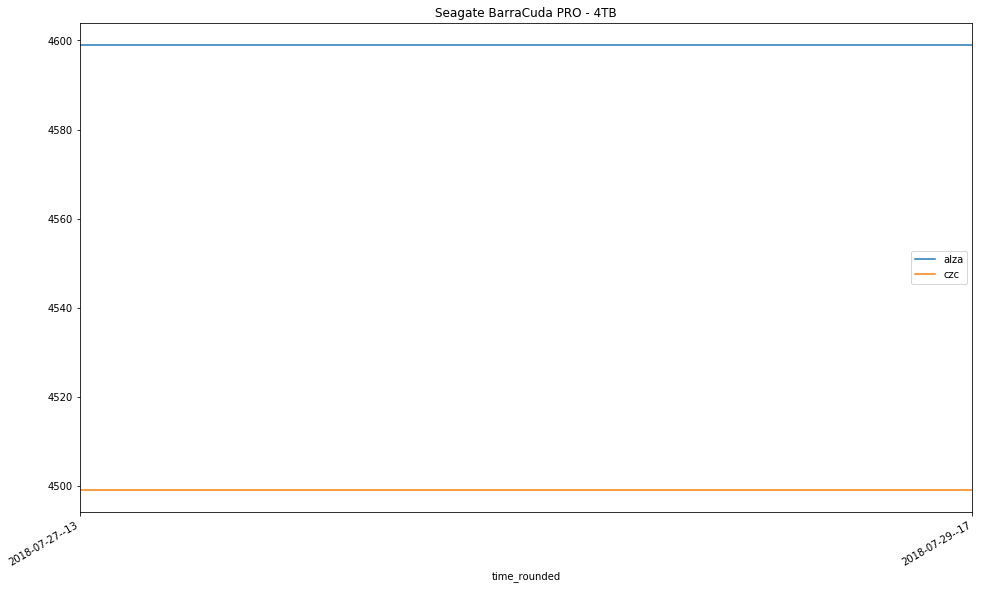

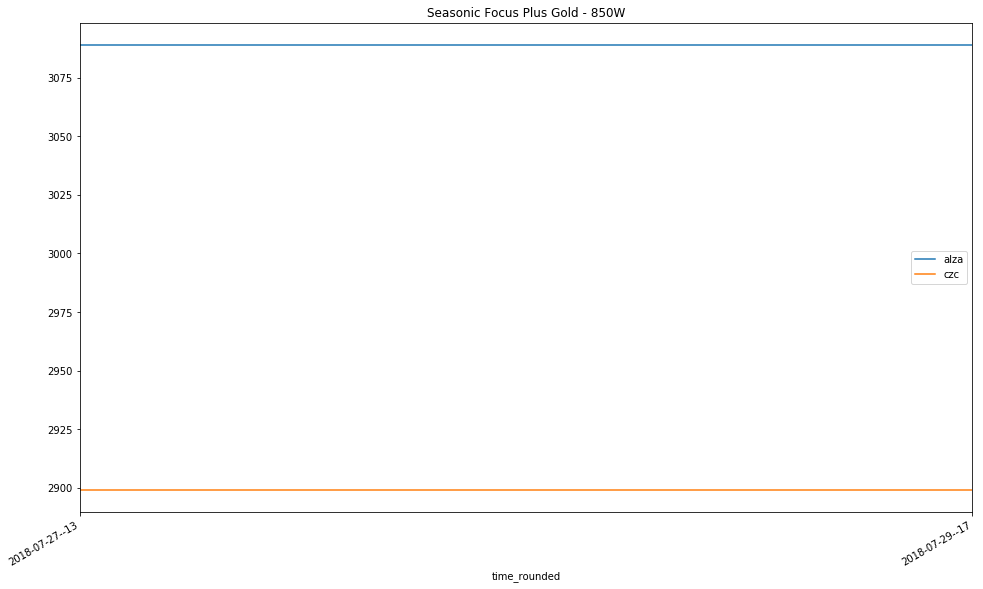

In [81]:
for label, grp in prices.groupby('product'):
    fig, ax = plt.subplots(figsize=(16, 10))
    plt.title(label)
    for shop_name, product in grp.groupby('shop'):
        product.plot(x='time_rounded', y='price', ax=ax, label=shop_name)
    plt.xticks(grp['time_rounded'].unique(), grp['time_rounded'].unique())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d--%H'))
    plt.show()

In [82]:
# Intel build
intel_components = [
    'Intel Core i7-7800X',
    'ASUS GeForce ROG-STRIX-GTX1080TI-11G-GAMING',
    'ASUS PRIME X299-A - Intel X299',
    'ADATA XPG GAMMIX D10 32GB (2x16GB) DDR4 3000',
    'Be quiet! Dark Rock PRO 4',
    'Samsung SSD 970 EVO (M.2) - 500GB',
    'Seagate BarraCuda PRO - 4TB',
    'Seasonic Focus Plus Gold - 850W',
    'Fractal Design Meshify C Blackout TG',
    'Arctic Fan F12',
    'Samsung C27HG70',
]

In [83]:
# AMD build
amd_components = [
    'AMD RYZEN Threadripper 1900X',
    'ASUS GeForce ROG-STRIX-GTX1080TI-11G-GAMING',
    'ASUS PRIME X399-A - AMD X399',
    'ADATA XPG GAMMIX D10 32GB (2x16GB) DDR4 3000',
    'Be quiet! Dark Rock PRO 4',
    'Samsung SSD 970 EVO (M.2) - 500GB',
    'Seagate BarraCuda PRO - 4TB',
    'Seasonic Focus Plus Gold - 850W',
    'Fractal Design Meshify C Blackout TG',
    'Arctic Fan F12',
    'Samsung C27HG70',
]

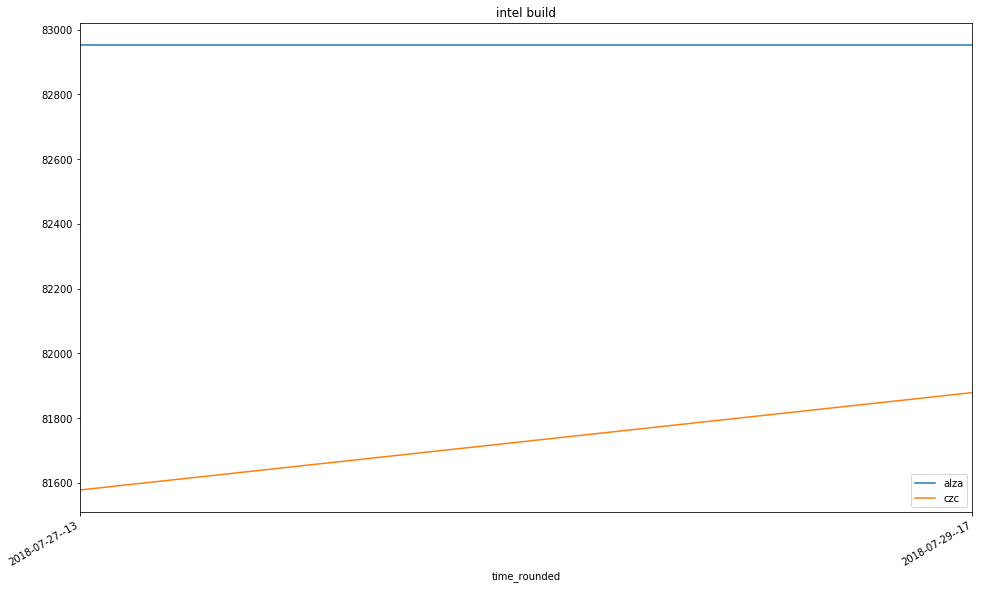

,time_rounded,shop,price
0,2018-07-27 13:00:00,alza,82953
1,2018-07-27 13:00:00,czc,81578
2,2018-07-29 17:00:00,alza,82953
3,2018-07-29 17:00:00,czc,81879


In [84]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title('intel build')
intel_build_price = prices[prices['product'].isin(intel_components)].groupby(['time_rounded', 'shop'])['price'].sum().to_frame('price').reset_index()
for shop_name, product in intel_build_price.groupby('shop'):
    product.plot(x='time_rounded', y='price', ax=ax, label=shop_name)
plt.xticks(intel_build_price['time_rounded'].unique(), intel_build_price['time_rounded'].unique())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d--%H'))
plt.show()
display(intel_build_price)

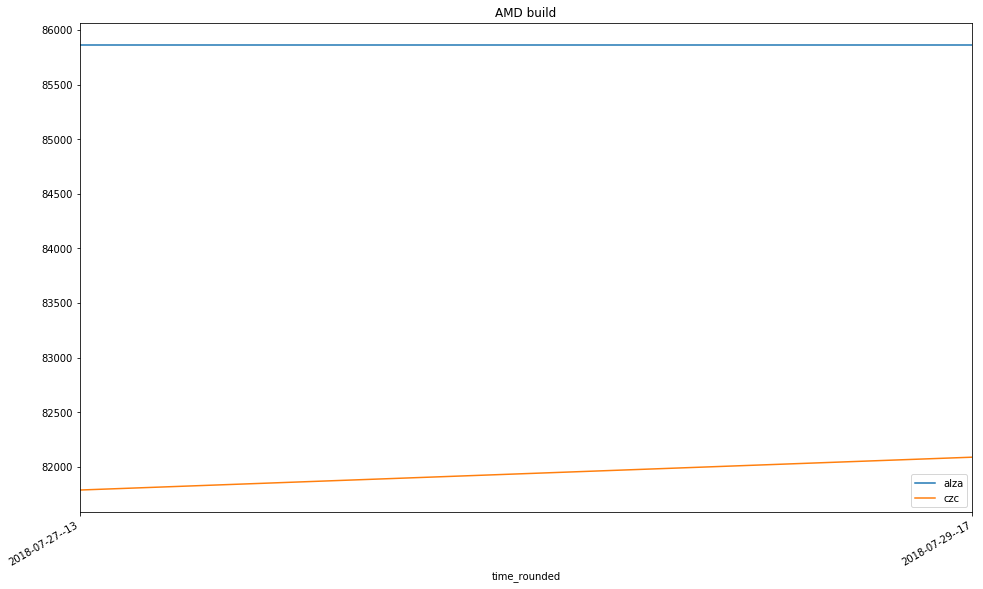

,time_rounded,shop,price
0,2018-07-27 13:00:00,alza,85863
1,2018-07-27 13:00:00,czc,81786
2,2018-07-29 17:00:00,alza,85863
3,2018-07-29 17:00:00,czc,82087


In [85]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title('AMD build')
amd_build_price = prices[prices['product'].isin(amd_components)].groupby(['time_rounded', 'shop'])['price'].sum().to_frame('price').reset_index()
for shop_name, product in amd_build_price.groupby('shop'):
    product.plot(x='time_rounded', y='price', ax=ax, label=shop_name)
plt.xticks(amd_build_price['time_rounded'].unique(), amd_build_price['time_rounded'].unique())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d--%H'))
plt.show()
display(amd_build_price)